In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~')
    
plt.rcParams['axes.unicode_minus'] = False

In [37]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import urllib
import time

In [38]:
import urllib.request

class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"



In [6]:
tmp1 = 'https://search.naver.com/search.naver?&where=news'
html = tmp1 + '&query={key_word}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=20&start={num}'
opener = AppURLopener()
response = opener.open(html.format(num=1, key_word = urllib.parse.quote('외식 프랜차이즈 인기')))
soup = BeautifulSoup(response, 'html.parser')
tmp = soup.find_all('dl')

C:\Users\ce401Prof\bigdata\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 불황기 외식업계, 블루오션이 대안...뜨는 유망프랜차이즈 창업아이템 특성은... 아시아뉴스통신  3일 전   보내기   많은 예비창업자들은 아이템 선정 시 외식프랜차이즈 창업시장에서 인기가 급부상한 아이템 및 브랜드에 대해 높은 관심을 보인다. 이때 대부분은 인터넷 검색으로 유망창업아이템을 알아보거나 창업박람회, 프랜차이즈... ',
 ' 대한민국 외식 프랜차이즈, 태국 외식시장서 인기몰이 헤럴드경제  4일 전  네이버뉴스   보내기   [사진제공=aT] 태국은 최근 경제성장과 소득증가에 따라 식음료에 대한 지출이 증가하고 있으며, 특히 외식소비가 늘어나면서 프랜차이즈 산업이 유망시장으로 떠오르고 있다. 또한, 동남아 한류 열풍의 중심지로... ',
 " 외식프랜차이즈 '대현매운족발' 소액창업 지원, 업종변경창업 아이템으로 눈길 미주중앙일보  23시간 전   보내기   한때 외식 프랜차이즈 시장에서 족발 창업이 붐을 일으키다가 인기가 한풀 꺽인 측면이 있지만 여전히 높은 수요와 대중성을 갖추고 있어 배달 전문점으로써 유망창업아이템이라는 평이다. 이 가운데 기름에 튀겨 색다른... ",
 ' 여름에 어울리는 외식창업아이템들... 디저트카페프랜차이즈도? 이투뉴스  1일 전   보내기   시원한 음식이나 보양식을 주 무기로 한 다양한 외식창업아이템들도 한껏 주목받고 있지만 가장 인기를 얻고... 한국 프랜차이즈 컨설팅 협회의 관계자는 "매출 편차가 높은 외식창업아이템들은 매달 나가야하는... ',
 ' 외식프랜차이즈 시장, 고기집창업 활기...아이템의 차별화된 성공요소와 유망... 아시아뉴스통신  6일 전   보내기   대중성과 꾸준한 수요가 장점인 고기집 창업은 스테디셀러 인

In [8]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1,1000,10)):
    response = opener.open(html.format(num=1, key_word = urllib.parse.quote('외식 프랜차이즈 인기')))
    soup = BeautifulSoup(response, 'html.parser')
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(0.5)

In [9]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [10]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [11]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함하는',
 '단어',
 '(+)',
 '제외하는',
 '단어',
 '(-)',
 '기본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이',
 '고자',
 '할',
 '때',
 '사용합',
 '니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분해서',
 '입력하세',
 '요',
 '.',
 '불황',
 '기',
 '외식',
 '업계',
 ',',
 '블루',
 '오션',
 '이',
 '대안',
 '...',
 '뜨는',
 '유망',
 '프랜차이즈',
 '창업',
 '아이템',
 '특성',
 '은',
 '...',
 '아시아',
 '뉴스',
 '통신',
 '3',
 '일',
 '전',
 '보내기',
 '많은',
 '예비',
 '창업',
 '자',
 '들',
 '은',
 '아이템',
 '선정',
 '시',
 '외식',
 '프랜차이즈',
 '창업',
 '시장',
 '에서',
 '인기',
 '가',
 '급부',
 '상',
 '한',
 '아이템',
 '및',
 '브랜드',
 '에',
 '대해',
 '높은',
 '관심',
 '을',
 '보인',
 '다',
 '.',
 '이',
 '때',
 '대부분',
 '은',
 '인터넷',
 '검색',
 '으로',
 '유망',
 '창업',
 '아이템',
 '을',
 '알아보거',
 '나',
 '창업',
 '박람회',
 ',',
 '프랜차이즈',
 '...',
 '대한민국',
 '외식',
 '프랜차이즈',
 ',',
 '태국',
 '외식',
 '시장',
 '서',
 '인기',
 '몰이',
 '헤럴드경제',
 '4',
 '일',
 '전',
 '네이버뉴

In [15]:
np.unique(tokens_ko)

array(['"', '")', "'", '("', '(+)', '(,)', '(-)', ',', '-', '.', '...',
       '....', '/', '06', '07', '08', '1', '10', '20', '2018', '23', '25',
       '3', '30', '4', '5', '6', '650', '7', '=', '?', 'C', 'DT', '[',
       ']', 'aT', '~', '‘', '’', '가', '가세', '가운데', '가장', '가정식', '각', '각광',
       '갖추고', '개', '검색', '결과', '경력', '경제', '경제성장', '경험', '고', '고객', '고기',
       '고자', '곳', '공략', '과', '관계자', '관심', '구분해서', '국내', '국수', '급', '급부',
       '급상승', '기', '기름', '기본', '기업', '김포', '꺽', '꾸준한', '끌', '나', '나가야',
       '나서는', '남부', '낸', '네이버뉴스', '년', '노하우', '높은', '눈길', '뉴스', '는',
       '늘어나면', '니다', '니즈', '다', '다가', '다양한', '단어', '달성', '닭', '닭반', '당',
       '대', '대부분', '대안', '대중성', '대한', '대한민국', '대해', '대현', '더', '도', '도시락',
       '동남아', '돼지갈비', '된', '들', '들이', '등', '디저트', '따라', '때', '떠오르', '또한',
       '뜨는', '로', '를', '마다', '마리', '만', '만들어진', '만원', '많은', '맛', '맞',
       '맞게', '맞이', '매김', '매달', '매운', '매출', '메뉴', '며', '면서', '명물', '모양새',
       '몰이', '무기', '문서', '문장', '물려', '미국', '미주', '및', 

In [16]:
ko = nltk.Text(tokens_ko, name = '외식 프랜차이즈 인기')
print(len(ko.tokens))
print(len(set(ko.tokens)))

76300
368


In [18]:
ko = nltk.Text(tokens_ko, name = '외식 프랜차이즈 인기')
ko.vocab().most_common(100)

[('창업', 2800),
 ('프랜차이즈', 2300),
 ('외식', 2200),
 ('.', 1900),
 ('아이템', 1900),
 ('이', 1600),
 ('...', 1600),
 (',', 1500),
 ('유망', 1000),
 ('보내기', 1000),
 ('인기', 1000),
 ("'", 1000),
 ('을', 900),
 ('가', 800),
 ('의', 800),
 ('는', 800),
 ('은', 800),
 ('들', 800),
 ('시장', 800),
 ('에', 800),
 ('일', 700),
 ('전', 700),
 ('다', 700),
 ('으로', 700),
 ('를', 600),
 ('검색', 500),
 ('단어', 500),
 ('에서', 500),
 ('최근', 500),
 ('인', 500),
 ('때', 400),
 ('한', 400),
 ('과', 400),
 ('소비', 400),
 ('"', 400),
 ('로', 300),
 ('업계', 300),
 ('높은', 300),
 ('서', 300),
 ('고', 300),
 ('미주', 300),
 ('중앙', 300),
 ('일보', 300),
 ('와', 300),
 ('가운데', 300),
 ('1', 300),
 ('주목', 300),
 ('받고', 300),
 ('스', 300),
 ('샤', 300),
 ('바나', 300),
 ('있는', 300),
 ('낸', 300),
 ('2018', 300),
 ('파주', 300),
 ('국수', 300),
 ('기본', 200),
 ('할', 200),
 ('블루', 200),
 ('오션', 200),
 ('뜨는', 200),
 ('특성', 200),
 ('아시아', 200),
 ('뉴스', 200),
 ('통신', 200),
 ('상', 200),
 ('태국', 200),
 ('며', 200),
 ('특히', 200),
 ('떠오르', 200),
 ('있다', 200),
 ('족발', 200),


In [19]:
stop_words =['"', '")', "'", '("', '(+)', '(,)', '(-)', ',', '-', '.', '...',
             '....', '/', '06', '07', '08', '1', '10', '20', '2018', '23', '25',
             '3', '30', '4', '5', '6', '650', '7', '=', '?', 'C', 'DT', '[',
             ']', 'aT', '~', '‘', '’', '가', '가세', '각', '개', '검색', '결과', '고', '곳',
             '과', '급', '기', '꺽', '끌', '나', '낸', '네이버뉴스', '년', '는','니다', '다', 
             '다가', '당', '대', '대해', '더', '도', '된', '들', '들이', '등', '때', '또한',
             '뜨는', '로', '를', '마다', '마리', '만', '맛', '맞','며', '면서','및', '상', '샤',
             '서','속', '수', '스', '시', '식', '양','에', '에게', '에도', '에서', '에서는', 
             '에서도', '여러', '와', '외', '요', '으로', '으로써', '은','을','의', '이', '이나',
             '이다', '이라는', '인', '인데', '인의', '일으키', '일치하는', '입', '입력하세', 
             '입력하실', '입력한', '있는', '있다', '있어', '있으', '있지', '자','적', '전', '주', 
             '줄이', '중이','찾아','큰','하', '한', '할', '했', '형', '화']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name = '외식 프랜차이즈 인기')
ko.vocab().most_common(50)

[('창업', 2800),
 ('프랜차이즈', 2300),
 ('외식', 2200),
 ('아이템', 1900),
 ('유망', 1000),
 ('보내기', 1000),
 ('인기', 1000),
 ('시장', 800),
 ('일', 700),
 ('단어', 500),
 ('최근', 500),
 ('소비', 400),
 ('업계', 300),
 ('높은', 300),
 ('미주', 300),
 ('중앙', 300),
 ('일보', 300),
 ('가운데', 300),
 ('주목', 300),
 ('받고', 300),
 ('바나', 300),
 ('파주', 300),
 ('국수', 300),
 ('기본', 200),
 ('블루', 200),
 ('오션', 200),
 ('특성', 200),
 ('아시아', 200),
 ('뉴스', 200),
 ('통신', 200),
 ('태국', 200),
 ('특히', 200),
 ('떠오르', 200),
 ('족발', 200),
 ('수요', 200),
 ('대중성', 200),
 ('전문점', 200),
 ('여름', 200),
 ('다양한', 200),
 ('관계자', 200),
 ('매출', 200),
 ('고기', 200),
 ('집', 200),
 ('요즘', 200),
 ('증시', 200),
 ('상장', 200),
 ('국내', 200),
 ('파이', 200),
 ('투데이', 200),
 ('닭', 200)]

In [20]:
np.unique(tokens_ko)

array(['가운데', '가장', '가정식', '각광', '갖추고', '경력', '경제', '경제성장', '경험', '고객',
       '고기', '고자', '공략', '관계자', '관심', '구분해서', '국내', '국수', '급부', '급상승',
       '기름', '기본', '기업', '김포', '꾸준한', '나가야', '나서는', '남부', '노하우', '높은',
       '눈길', '뉴스', '늘어나면', '니즈', '다양한', '단어', '달성', '닭', '닭반', '대부분',
       '대안', '대중성', '대한', '대한민국', '대현', '도시락', '동남아', '돼지갈비', '디저트', '따라',
       '떠오르', '만들어진', '만원', '많은', '맞게', '맞이', '매김', '매달', '매운', '매출',
       '메뉴', '명물', '모양새', '몰이', '무기', '문서', '문장', '물려', '미국', '미주', '바나',
       '박람회', '반드시', '반짝', '받고', '배달', '백종원', '범위', '변경', '변화', '변화된',
       '보내기', '보다', '보쌈', '보양식', '보인', '본', '부침', '불황', '붐', '브랜드', '블루',
       '빠른', '사용합', '사진', '산업', '삼겹살', '삽겹살', '상권', '상세', '상장', '새로운',
       '색다른', '서민', '선정', '성공', '성장할', '셀러', '소득', '소문', '소비', '소액', '속도',
       '수상', '수요', '쉼표', '승부', '시간', '시원한', '시장', '시킨', '실시', '실제', '심하다',
       '아시아', '아이템', '알아보거', '어울리는', '얻고', '업계', '업종', '에너지', '여름', '여성',
       '여전히', '연구', '열풍', '예비', '예외', '오션', '올해', '외식', '

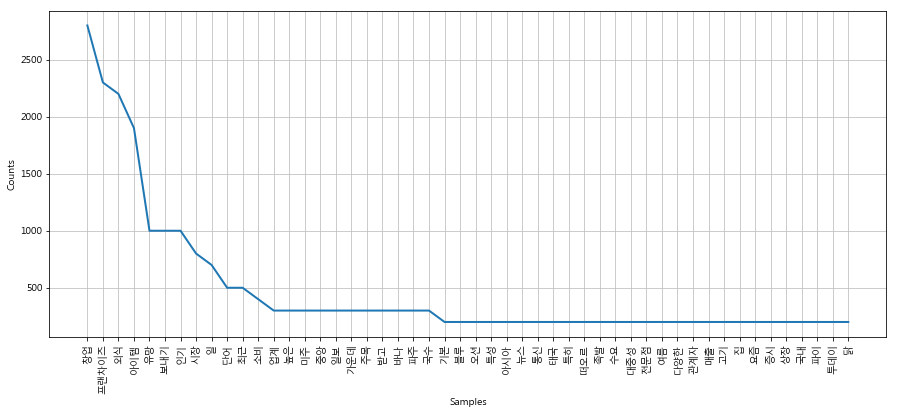

In [21]:
plt.figure(figsize = (15,6))
ko.plot(50)
plt.show()

In [22]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

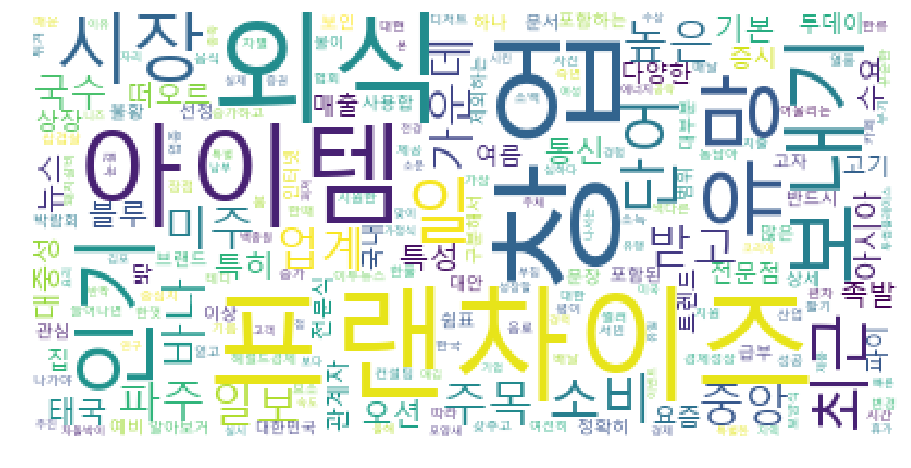

In [23]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf', relative_scaling=0.5,
                      background_color='white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [24]:
mask = np.array(Image.open('../data/09. heart.jpg'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [25]:
data = ko.vocab().most_common(200)
wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf', relative_scaling=0.1,
                      mask = mask, background_color='white',
                      min_font_size = 1, max_font_size =100
                     ).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array()

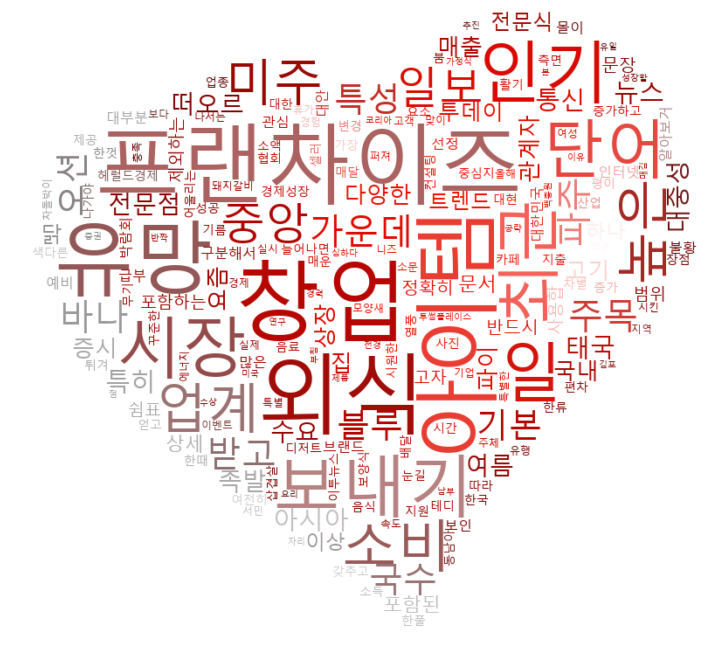

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
import gensim
from gensim.models import word2vec

C:\Users\ce401Prof\bigdata\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [28]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r=[]
    
    for word in malist:
        if not word[1] in ['Josa','Eomi','Punctuation']:
            r.append(word[0])
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템 알아보다 창업 박람회 프랜차이즈
대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어울리다 외식 창업 아이템 들 디저트 카페 프랜차이즈 이투뉴스 1 일 전 보내다 시원하다 음식 보양식 주 무기 하다 다양하다 외식 창업 아이템 들 한껏 주목 받다 있다 가장 인기 얻다 한국 프랜차이즈 컨설팅 협회 관계자 매출 편차 높다 외식 창업 아이템 들 매달 나가다
외식 프랜차이즈 시장 고기 집 창업 활기 아이템 차별 화 되다 성공 요소 유망 아시아 뉴스 통신 6 일 전 보내다 대중성 꾸준하다 수요 장점 고기 집 창업 스 테디 셀러 인기 아이템 최근 외식 프랜차이즈 창업 시장 삽겹살 돼지갈비 등 서민 형 아이템 들 가운데 차돌박이 전문점 유행 일으키다 가세 모양새
유망 프랜차이즈 창업 ‘ 샤 이 바나 ’ 여름 휴가 맞이 특별 이벤트 실시 미주

특화된 메뉴 승부 수 외식 프랜차이즈 창업 파주 명물 닭반 마리 국수 파이 내다 스 투데이 2018 06 25 보내다 하지만 최근 외식 프랜차이즈 창업 시장 새롭다 인기 창업 아이템 떠오르다 있다 프리미엄 칼국수 전문 프랜차이즈 파주 닭 국수 예외 파주 닭 국수 늘다 C 급 상권 일 매출 650 만원 달성 하다 1 인 창업
외식 업계 소비 트렌드 변화 속 요즘 뜨다 유망 프랜차이즈 창업 아이템 주목 미주 중앙 일보 2018 07 08 보내다 전문식 당 들이다 인기 급상승 중이 이 가운데 혼밥 전문식 당 변화 되다 외식 소비 트렌드 맞다 물다 외식 창업 시장 유망 프랜차이즈 창업 아이템 각광 받다 있다 보쌈 삼겹살 1 인의 양 맞다 도시락 정식
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템 알아보다 창업 박람회 프랜차이즈
대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어

외식 프랜차이즈 기업 들 올해 증시 상장 속도 내다 에너지 경제 7 일 전 보내다 투썸플레이스 김포 DT 점 전경 요리 연구 백종원 ‘ 더 보다 코리아 ’ 증시 상장 추진 국내 외식 프랜차이즈 증권 업계 하다 관계자 프랜차이즈 특성 상 부치다 심하다 면서 제품 인기 반짝 하다 때 성장 하다 수
샤 이 바나 유망 외식 프랜차이즈 창업 아이템 속 블루 오션 공략 파이 내다 스 투데이 2018 07 10 보내다 유망 외식 프랜차이즈 창업 아이템 자리 매김 하다 국내 유일 미국 남부 가정식 샤 이 바나 창업 최근 인기 창업 아이템 주목 받다 있다 이유 다양하다 수상 경력 외 10 년 노하우 통해 만들어지다 파격 적
특화된 메뉴 승부 수 외식 프랜차이즈 창업 파주 명물 닭반 마리 국수 파이 내다 스 투데이 2018 06 25 보내다 하지만 최근 외식 프랜차이즈 창업 시장 새롭다 인기 창업 아이템 떠오르다 있다 프리미엄 칼국수 전문 프랜차이즈 파주 닭 국수 예외 파주 닭 국수 늘다 C 급 상권 일 매출 650 만원 달성 하다 1 인 창업
외식 업계 소비 트렌드 변화 속 요즘 뜨다 유망 프랜차이즈 창업 아이템 주목 미주 중앙 일보 2018 07 08 보내다 전문식 당 들이다 인기 급상승 중이 이 가운데 혼밥 전문식 당 변화 되다 외식 소비 트렌드 맞다 물다 외식 창업 시장 유망 프랜차이즈 창업 아이템 각광 받다 있다 보쌈 삼겹살 1 인의 양 맞다 도시락 정식
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템

외식 프랜차이즈 시장 고기 집 창업 활기 아이템 차별 화 되다 성공 요소 유망 아시아 뉴스 통신 6 일 전 보내다 대중성 꾸준하다 수요 장점 고기 집 창업 스 테디 셀러 인기 아이템 최근 외식 프랜차이즈 창업 시장 삽겹살 돼지갈비 등 서민 형 아이템 들 가운데 차돌박이 전문점 유행 일으키다 가세 모양새
유망 프랜차이즈 창업 ‘ 샤 이 바나 ’ 여름 휴가 맞이 특별 이벤트 실시 미주 중앙 일보 5 일 전 보내다 크다 인기 끌 있다 외식 프랜차이즈 창업 아이템 실제 보다 특별하다 맛 경험 찾다 나서다 요즘 고객 들 니즈 충족 시키다 이 곳 특히 소비 주체 20 30 대다 여성 들 빠르다 입 소문 퍼지다 최근 각 지역
외식 프랜차이즈 기업 들 올해 증시 상장 속도 내다 에너지 경제 7 일 전 보내다 투썸플레이스 김포 DT 점 전경 요리 연구 백종원 ‘ 더 보다 코리아 ’ 증시 상장 추진 국내 외식 프랜차이즈 증권 업계 하다 관계자 프랜차이즈 특성 상 부치다 심하다 면서 제품 인기 반짝 하다 때 성장 하다 수
샤 이 바나 유망 외식 프랜차이즈 창업 아이템 속 블루 오션 공략 파이 내다 스 투데이 2018 07 10 보내다 유망 외식 프랜차이즈 창업 아이템 자리 매김 하다 국내 유일 미국 남부 가정식 샤 이 바나 창업 최근 인기 창업 아이템 주목 받다 있다 이유 다양하다 수상 경력 외 10 년 노하우 통해 만들어지다 파격 적
특화된 메뉴 승부 수 외식 프랜차이즈 창업 파주 명물 닭반 마리 국수 파이 내다 스 투데이 2018 06 25 보내다 하지만 최근 외식 프랜차이즈 창업 시장 새롭다 인기 창업 아이템 떠오르다 있다 프리미엄 칼국수 전문 프랜차이즈 파주 닭 국수 예외 파주 닭 국수 늘다 C 급 상권 일 매출 650 만원 달성 하다 1 인 창업
외식 업계 소비 트렌드 변화 속 요즘 뜨다 유망 프랜차이즈 창업 아이템 주목 미주 중앙 일보 2018 07 08 보내다 전문식 당 들이다 인기 급상승 중이 이 가운데 혼밥 전문식 당 변화 되다 외식 소비 트렌드 맞다 물다 외식 

대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어울리다 외식 창업 아이템 들 디저트 카페 프랜차이즈 이투뉴스 1 일 전 보내다 시원하다 음식 보양식 주 무기 하다 다양하다 외식 창업 아이템 들 한껏 주목 받다 있다 가장 인기 얻다 한국 프랜차이즈 컨설팅 협회 관계자 매출 편차 높다 외식 창업 아이템 들 매달 나가다
외식 프랜차이즈 시장 고기 집 창업 활기 아이템 차별 화 되다 성공 요소 유망 아시아 뉴스 통신 6 일 전 보내다 대중성 꾸준하다 수요 장점 고기 집 창업 스 테디 셀러 인기 아이템 최근 외식 프랜차이즈 창업 시장 삽겹살 돼지갈비 등 서민 형 아이템 들 가운데 차돌박이 전문점 유행 일으키다 가세 모양새
유망 프랜차이즈 창업 ‘ 샤 이 바나 ’ 여름 휴가 맞이 특별 이벤트 실시 미주 중앙 일보 5 일 전 보내다 크다 인기 끌 있다 외식 프랜차이즈 창업 아이템 실제 보다 특별하다 맛 경험 찾다 나서다 요즘 고객 들 니즈 충족 시키다 이 곳 특히 소비 주체 20 30 대다 여성 들 빠르다 입 소문 퍼지다 최근 각 지역
외식 프랜차이즈 기업 들 올해 증시 상장 속도 내다 에너지 경제 7 일 전 보내다 투썸플레이스 김포 DT 점 전경 요리 연구 백종원 ‘ 더 보다 코리아 ’ 증시 상장 추진 국내 외식 프랜차이즈 증권 업계 하다 관계자 프랜차이즈 특성 상 부치다 심하다 면서 제품 인기 반짝 하다 때 성장 하다 수
샤 이 바나 유망 외식 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템 알아보다 창업 박람회 프랜차이즈
대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어울리다 외식 창업 아이템 들 디저트 카페 프랜차이즈 이투뉴스 1 일 전 보내다 시원하다 음식 보양식 주 무기 하다 다양하다 외식 창업 아이템 들 한껏 주목 받다 있다 가장 인기 얻다 한국 프랜차이즈 컨설팅 협회 관계자 매출 편차 높다 외식 창업 아이템 들 매달 나가다
외식 프랜차이즈 시장 고기 집 창업 활기 아이템 차별 화 되다 성공 요소 유망 아시아 뉴스 통신 6 일 전 보내다 대중성 꾸준하다 수요 장점 고기 집 창업 스 테디 셀러 인기 아이템 최근 외식 프랜차이즈 창업 시장 삽겹살 돼지갈비 등 서민 형 아이템 들 가운데 차돌박이 전문점 유행 일으키다 가세 모양새
유망 프랜차이즈 창업 ‘ 샤 이 바나 ’ 여름 휴가 맞이 특별 이벤트 실시 미주 중앙 일보 5 일 전 보내다 크다 인기 끌 있다 외식 프랜

특화된 메뉴 승부 수 외식 프랜차이즈 창업 파주 명물 닭반 마리 국수 파이 내다 스 투데이 2018 06 25 보내다 하지만 최근 외식 프랜차이즈 창업 시장 새롭다 인기 창업 아이템 떠오르다 있다 프리미엄 칼국수 전문 프랜차이즈 파주 닭 국수 예외 파주 닭 국수 늘다 C 급 상권 일 매출 650 만원 달성 하다 1 인 창업
외식 업계 소비 트렌드 변화 속 요즘 뜨다 유망 프랜차이즈 창업 아이템 주목 미주 중앙 일보 2018 07 08 보내다 전문식 당 들이다 인기 급상승 중이 이 가운데 혼밥 전문식 당 변화 되다 외식 소비 트렌드 맞다 물다 외식 창업 시장 유망 프랜차이즈 창업 아이템 각광 받다 있다 보쌈 삼겹살 1 인의 양 맞다 도시락 정식
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템 알아보다 창업 박람회 프랜차이즈
대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어

외식 프랜차이즈 기업 들 올해 증시 상장 속도 내다 에너지 경제 7 일 전 보내다 투썸플레이스 김포 DT 점 전경 요리 연구 백종원 ‘ 더 보다 코리아 ’ 증시 상장 추진 국내 외식 프랜차이즈 증권 업계 하다 관계자 프랜차이즈 특성 상 부치다 심하다 면서 제품 인기 반짝 하다 때 성장 하다 수
샤 이 바나 유망 외식 프랜차이즈 창업 아이템 속 블루 오션 공략 파이 내다 스 투데이 2018 07 10 보내다 유망 외식 프랜차이즈 창업 아이템 자리 매김 하다 국내 유일 미국 남부 가정식 샤 이 바나 창업 최근 인기 창업 아이템 주목 받다 있다 이유 다양하다 수상 경력 외 10 년 노하우 통해 만들어지다 파격 적
특화된 메뉴 승부 수 외식 프랜차이즈 창업 파주 명물 닭반 마리 국수 파이 내다 스 투데이 2018 06 25 보내다 하지만 최근 외식 프랜차이즈 창업 시장 새롭다 인기 창업 아이템 떠오르다 있다 프리미엄 칼국수 전문 프랜차이즈 파주 닭 국수 예외 파주 닭 국수 늘다 C 급 상권 일 매출 650 만원 달성 하다 1 인 창업
외식 업계 소비 트렌드 변화 속 요즘 뜨다 유망 프랜차이즈 창업 아이템 주목 미주 중앙 일보 2018 07 08 보내다 전문식 당 들이다 인기 급상승 중이 이 가운데 혼밥 전문식 당 변화 되다 외식 소비 트렌드 맞다 물다 외식 창업 시장 유망 프랜차이즈 창업 아이템 각광 받다 있다 보쌈 삼겹살 1 인의 양 맞다 도시락 정식
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템

외식 프랜차이즈 시장 고기 집 창업 활기 아이템 차별 화 되다 성공 요소 유망 아시아 뉴스 통신 6 일 전 보내다 대중성 꾸준하다 수요 장점 고기 집 창업 스 테디 셀러 인기 아이템 최근 외식 프랜차이즈 창업 시장 삽겹살 돼지갈비 등 서민 형 아이템 들 가운데 차돌박이 전문점 유행 일으키다 가세 모양새
유망 프랜차이즈 창업 ‘ 샤 이 바나 ’ 여름 휴가 맞이 특별 이벤트 실시 미주 중앙 일보 5 일 전 보내다 크다 인기 끌 있다 외식 프랜차이즈 창업 아이템 실제 보다 특별하다 맛 경험 찾다 나서다 요즘 고객 들 니즈 충족 시키다 이 곳 특히 소비 주체 20 30 대다 여성 들 빠르다 입 소문 퍼지다 최근 각 지역
외식 프랜차이즈 기업 들 올해 증시 상장 속도 내다 에너지 경제 7 일 전 보내다 투썸플레이스 김포 DT 점 전경 요리 연구 백종원 ‘ 더 보다 코리아 ’ 증시 상장 추진 국내 외식 프랜차이즈 증권 업계 하다 관계자 프랜차이즈 특성 상 부치다 심하다 면서 제품 인기 반짝 하다 때 성장 하다 수
샤 이 바나 유망 외식 프랜차이즈 창업 아이템 속 블루 오션 공략 파이 내다 스 투데이 2018 07 10 보내다 유망 외식 프랜차이즈 창업 아이템 자리 매김 하다 국내 유일 미국 남부 가정식 샤 이 바나 창업 최근 인기 창업 아이템 주목 받다 있다 이유 다양하다 수상 경력 외 10 년 노하우 통해 만들어지다 파격 적
특화된 메뉴 승부 수 외식 프랜차이즈 창업 파주 명물 닭반 마리 국수 파이 내다 스 투데이 2018 06 25 보내다 하지만 최근 외식 프랜차이즈 창업 시장 새롭다 인기 창업 아이템 떠오르다 있다 프리미엄 칼국수 전문 프랜차이즈 파주 닭 국수 예외 파주 닭 국수 늘다 C 급 상권 일 매출 650 만원 달성 하다 1 인 창업
외식 업계 소비 트렌드 변화 속 요즘 뜨다 유망 프랜차이즈 창업 아이템 주목 미주 중앙 일보 2018 07 08 보내다 전문식 당 들이다 인기 급상승 중이 이 가운데 혼밥 전문식 당 변화 되다 외식 소비 트렌드 맞다 물다 외식 

대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어울리다 외식 창업 아이템 들 디저트 카페 프랜차이즈 이투뉴스 1 일 전 보내다 시원하다 음식 보양식 주 무기 하다 다양하다 외식 창업 아이템 들 한껏 주목 받다 있다 가장 인기 얻다 한국 프랜차이즈 컨설팅 협회 관계자 매출 편차 높다 외식 창업 아이템 들 매달 나가다
외식 프랜차이즈 시장 고기 집 창업 활기 아이템 차별 화 되다 성공 요소 유망 아시아 뉴스 통신 6 일 전 보내다 대중성 꾸준하다 수요 장점 고기 집 창업 스 테디 셀러 인기 아이템 최근 외식 프랜차이즈 창업 시장 삽겹살 돼지갈비 등 서민 형 아이템 들 가운데 차돌박이 전문점 유행 일으키다 가세 모양새
유망 프랜차이즈 창업 ‘ 샤 이 바나 ’ 여름 휴가 맞이 특별 이벤트 실시 미주 중앙 일보 5 일 전 보내다 크다 인기 끌 있다 외식 프랜차이즈 창업 아이템 실제 보다 특별하다 맛 경험 찾다 나서다 요즘 고객 들 니즈 충족 시키다 이 곳 특히 소비 주체 20 30 대다 여성 들 빠르다 입 소문 퍼지다 최근 각 지역
외식 프랜차이즈 기업 들 올해 증시 상장 속도 내다 에너지 경제 7 일 전 보내다 투썸플레이스 김포 DT 점 전경 요리 연구 백종원 ‘ 더 보다 코리아 ’ 증시 상장 추진 국내 외식 프랜차이즈 증권 업계 하다 관계자 프랜차이즈 특성 상 부치다 심하다 면서 제품 인기 반짝 하다 때 성장 하다 수
샤 이 바나 유망 외식 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템 알아보다 창업 박람회 프랜차이즈
대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어울리다 외식 창업 아이템 들 디저트 카페 프랜차이즈 이투뉴스 1 일 전 보내다 시원하다 음식 보양식 주 무기 하다 다양하다 외식 창업 아이템 들 한껏 주목 받다 있다 가장 인기 얻다 한국 프랜차이즈 컨설팅 협회 관계자 매출 편차 높다 외식 창업 아이템 들 매달 나가다
외식 프랜차이즈 시장 고기 집 창업 활기 아이템 차별 화 되다 성공 요소 유망 아시아 뉴스 통신 6 일 전 보내다 대중성 꾸준하다 수요 장점 고기 집 창업 스 테디 셀러 인기 아이템 최근 외식 프랜차이즈 창업 시장 삽겹살 돼지갈비 등 서민 형 아이템 들 가운데 차돌박이 전문점 유행 일으키다 가세 모양새
유망 프랜차이즈 창업 ‘ 샤 이 바나 ’ 여름 휴가 맞이 특별 이벤트 실시 미주 중앙 일보 5 일 전 보내다 크다 인기 끌 있다 외식 프랜

특화된 메뉴 승부 수 외식 프랜차이즈 창업 파주 명물 닭반 마리 국수 파이 내다 스 투데이 2018 06 25 보내다 하지만 최근 외식 프랜차이즈 창업 시장 새롭다 인기 창업 아이템 떠오르다 있다 프리미엄 칼국수 전문 프랜차이즈 파주 닭 국수 예외 파주 닭 국수 늘다 C 급 상권 일 매출 650 만원 달성 하다 1 인 창업
외식 업계 소비 트렌드 변화 속 요즘 뜨다 유망 프랜차이즈 창업 아이템 주목 미주 중앙 일보 2018 07 08 보내다 전문식 당 들이다 인기 급상승 중이 이 가운데 혼밥 전문식 당 변화 되다 외식 소비 트렌드 맞다 물다 외식 창업 시장 유망 프랜차이즈 창업 아이템 각광 받다 있다 보쌈 삼겹살 1 인의 양 맞다 도시락 정식
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
불황 기 외식 업계 블루 오션 대안 뜨다 유망 프랜차이즈 창업 아이템 특성 아시아 뉴스 통신 3 일 전 보내다 많다 예비 창업 자 들 아이템 선정 시 외식 프랜차이즈 창업 시장 인기 급부 상 아이템 및 브랜드 대해 높다 관심 보이다 이 때 대부분 인터넷 검색 유망 창업 아이템 알아보다 창업 박람회 프랜차이즈
대한민국 외식 프랜차이즈 태국 외식 시장 인기 몰이 헤럴드경제 4 일 전 네이버뉴스 보내다 사진 제공 aT 태국 최근 경제성장 소득 증가 따르다 식 음료 대한 지출 증가 하다 있다 특히 외식 소비 늘어나다 프랜차이즈 산업 유망 시장 떠오르다 있다 또한 동남아 한류 열풍 중심지
외식 프랜차이즈 대현 맵다 족발 소액 창업 지원 업종 변경 창업 아이템 눈길 미주 중앙 일보 23 시간 전 보내다 한때 외식 프랜차이즈 시장 족발 창업 붐 일으키다 인기 한풀 꺽 측면 있다 여전하다 높다 수요 대중성 갖추다 있다 배달 전문점 유망 창업 아이템 평이 이 가운데 기름 튀기다 색다르다
여름 어

In [29]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [30]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size =200, window=10, hs=1, min_count=2, sg=1)

model.save('pres_girl.model')

In [31]:
model = word2vec.Word2Vec.load('pres_girl.model')

In [32]:
model.most_similar(positive = ['인기'])

C:\Users\ce401Prof\bigdata\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\ce401Prof\bigdata\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('높다', 0.3597237765789032),
 ('가운데', 0.3525022864341736),
 ('아이템', 0.3236667811870575),
 ('주목', 0.32120481133461),
 ('브랜드', 0.29589471220970154),
 ('프랜차이즈', 0.29360246658325195),
 ('헤럴드경제', 0.2888703942298889),
 ('혼밥', 0.2806762158870697),
 ('창업', 0.2801966965198517),
 ('전문점', 0.27126172184944153)]

In [33]:
model.most_similar(positive = ['외식'])

C:\Users\ce401Prof\bigdata\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\ce401Prof\bigdata\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('프랜차이즈', 0.6499170660972595),
 ('시장', 0.4299021363258362),
 ('2018', 0.32334673404693604),
 ('보내다', 0.3122261166572571),
 ('창업', 0.2830691933631897),
 ('전', 0.2756422162055969),
 ('전경', 0.2667229175567627),
 ('떠오르다', 0.2645169496536255),
 ('파이', 0.24143706262111664),
 ('스', 0.2404526323080063)]

In [34]:
model.most_similar(positive = ['외식','프랜차이즈'])

C:\Users\ce401Prof\bigdata\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\ce401Prof\bigdata\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('시장', 0.4211847484111786),
 ('창업', 0.3773982524871826),
 ('아이템', 0.3117338716983795),
 ('전', 0.29880982637405396),
 ('대해', 0.28509724140167236),
 ('떠오르다', 0.28375300765037537),
 ('파주', 0.2800152003765106),
 ('보내다', 0.27968013286590576),
 ('2018', 0.2779715955257416),
 ('전경', 0.27513206005096436)]

In [35]:
model.most_similar(positive = ['프랜차이즈'], negative=['창업'])

C:\Users\ce401Prof\bigdata\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\ce401Prof\bigdata\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('외식', 0.3355821967124939),
 ('업계', 0.21290993690490723),
 ('요리', 0.19847822189331055),
 ('반짝', 0.18381093442440033),
 ('관계자', 0.18115460872650146),
 ('수', 0.17613370716571808),
 ('부치다', 0.17481498420238495),
 ('제품', 0.1680399477481842),
 ('백종원', 0.16547438502311707),
 ('심하다', 0.1639554798603058)]